# Loan Prediction System

The objective of this system is to predict either a person is eligible to apply for Loan or Not based on certain parameters or attributes like gender,marital status,employment,Income,credit history etc.The Prediction algorithm used for the system's implementation is Naive Byes Classification due to its maximum accuracy score.
 
 
Rows : 614

Columns : 13

Dataset : Kaggle

Jupyter Notebook : https://github.com/shravanikadam

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import joblib as joblib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Reading the training dataset in a dataframe using Pandas
dataset = pd.read_csv("train.csv")


# Understanding the column (Attributes) of the dataset

In [3]:
# First 10 Rows of training Dataset
dataset.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
#No of Entries and Columns of training dataset
dataset.shape

(614, 13)

In [5]:
# Concise Summary of data in the training dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Summary of numerical variables for training data set
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1.For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not.

In [7]:
# Get the unique values and their frequency of variable Property_Area

dataset['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [8]:
pd.crosstab(dataset['Property_Area'],dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [9]:
# Loan approval rates in absolute numbers
loan_approval = dataset['Loan_Status'].value_counts()['Y']
print('Total no of Loans Approved :',loan_approval)

Total no of Loans Approved : 422


In [10]:
# Credit History and Loan Status
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [11]:
def percentageConvert(ser):
    return ser/float(ser[-1])

 #Loan approval rate for customers having Credit_History (1)
#dataset['Y'] = pd.crosstab(dataset ["Credit_History"], dataset ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
#loan_approval_with_Credit_1 = dataset['Y'][1]
#print(loan_approval_with_Credit_1*100)

- 79.58 % of the applicants whose loans were approved have Credit_History equals to 1.

In [12]:
pd.crosstab(dataset['Education'],dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


Understanding Distribution of Numerical Variables

1.ApplicantIncome

2.LoanAmount

# Understanding the Outliers and treatment

<AxesSubplot:>

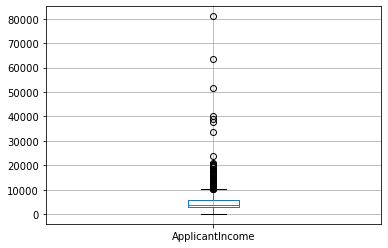

In [13]:
# Box Plot for variable ApplicantIncome of training data set
dataset.boxplot(column='ApplicantIncome')

3.The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

<AxesSubplot:>

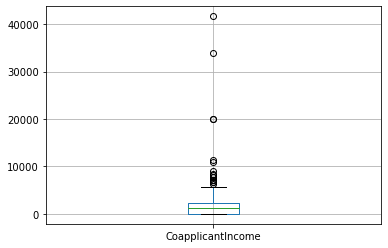

In [14]:
# Box Plot for variable CoapplicantIncome of training data set
dataset.boxplot(column='CoapplicantIncome')

<AxesSubplot:>

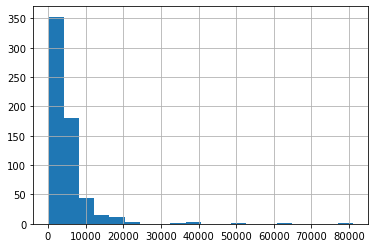

In [15]:
# Histogram of variable ApplicantIncome
dataset['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

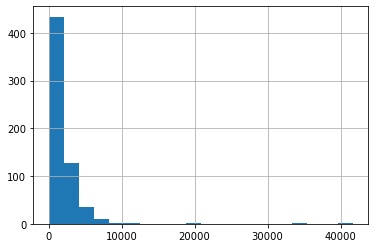

In [16]:
# Histogram of variable CoapplicantIncome
dataset['CoapplicantIncome'].hist(bins=20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

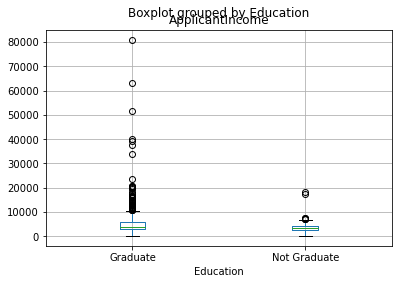

In [17]:
# Box Plot for variable ApplicantIncome by variable Education of training data set
dataset.boxplot(column='ApplicantIncome', by= 'Education')

4.We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

<AxesSubplot:>

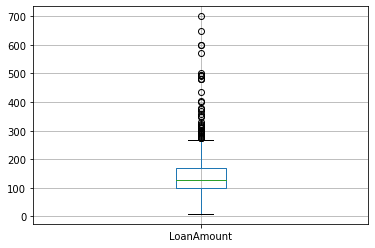

In [18]:
# Box Plot for variable LoanAmount of training data set
dataset.boxplot(column='LoanAmount')

5. LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values

<AxesSubplot:>

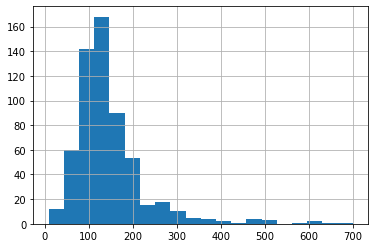

In [19]:
# Histogram of variable LoanAmount
dataset['LoanAmount'].hist(bins=20)

6. The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect

<AxesSubplot:>

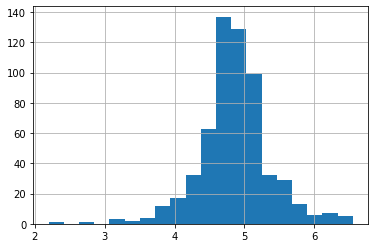

In [20]:
# Perform log transformation of TLoanAmount to make it closer to normal
dataset['Loanamt_log']=np.log(dataset['LoanAmount'])
# Histogram of variable LoanAmount
dataset['Loanamt_log'].hist(bins=20)

In [21]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
dataset['TotalIncome']= dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
# Perform log transformation of TotalIncome to make it closer to normal
dataset['TotalIncome_log']= np.log(dataset['TotalIncome'])

<AxesSubplot:>

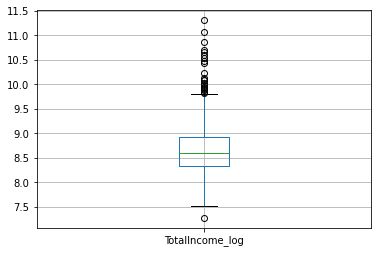

In [22]:
# Box Plot for variable TotalIncome of training data set
dataset.boxplot(column='TotalIncome_log')

<AxesSubplot:>

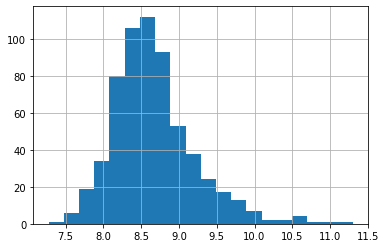

In [23]:
# Looking at the distribtion of TotalIncome
dataset['TotalIncome_log'].hist(bins=20)

# Data Preparation for Model Building

- sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset.

In [24]:
#returns total no of missing values for each attribute
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Loanamt_log          22
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [25]:
# Impute missing values for Gender
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

In [26]:
# Impute missing values for Married 
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

In [27]:
# Impute missing values for Dependents
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

In [28]:
# Impute missing values for Self_Employed
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)

In [29]:
# Impute missing values for LoanAmount
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.Loanamt_log = dataset.Loanamt_log.fillna(dataset.Loanamt_log.mean())

In [30]:
# Impute missing values for Loan_Amount_Term
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [31]:
# Impute missing values for Credit_History
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [32]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loanamt_log          0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [33]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamt_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Loanamt_log        614 non-null    float64
 14  TotalIncome        614 non-null    float64
 15  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(1), o

In [35]:
# Selecting Attribute Data for Model Training
x= dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y= dataset.iloc[:,12].values

In [36]:
#print x
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [37]:
#print y
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

# Model Building

In [38]:
#Dividing the training dataset(80%) in train and test sets(20%) 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
print(x_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [40]:
#To convert the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [41]:
#for loop for conversion of first 5 attributes
for i in range(0,5):
    x_train[:,i]= labelencoder_x.fit_transform(x_train[:,i])

In [42]:
x_train[:,7]= labelencoder_x.fit_transform(x_train[:,7])

In [43]:
x_train


array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [44]:
labelencoder_y = LabelEncoder()
y_train= labelencoder_y.fit_transform(y_train)

In [45]:
y_train


array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [46]:
for i in range(0,5):
    x_test[:,i]= labelencoder_x.fit_transform(x_test[:,i])

In [47]:
x_train[:,7]= labelencoder_x.fit_transform(x_train[:,7])

In [48]:
labelencoder_y = LabelEncoder()
y_test= labelencoder_y.fit_transform(y_test)

In [49]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 7085.0],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 4230.0],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 10039.0],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 6784.0],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 3875.0],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 6058.0],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 6417.0],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 12876.0],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 5124.0],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 5233.0],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 2917.0],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2895.0],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 8333.0],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 8667.0],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 14880.0],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 3875.0],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 4311.0],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371

In [50]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [51]:
#Scaling the training dataset
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

# Decision Tree

In [52]:
#checking accuracy for Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier(criterion='entropy',max_depth=4)
#Training the model
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [53]:
#predicting the values of x_test
y_pred= DTClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [54]:
#calculating accuracy for decision tree algorithm
from sklearn import metrics
print('The accuracy of decision tree is : ',metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is :  0.8292682926829268


In [55]:
joblib.dump(DTClassifier,"dtf.pkl")

['dtf.pkl']

# Prediction for Testing Dataset 

In [56]:
LoanEligible = ['Congratulations your eligible for loan', 'Sorry! your not eligible for loan']

In [57]:
attributes = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [58]:
dataset.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
dataset.replace({'Married':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'Dependents':{'+3':0,'3+':1}},inplace=True)
dataset.replace({'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)
dataset.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)
dataset.replace({'Property_Area':{'Urban':0,'Rural':1, 'Semiurban': 2}},inplace=True)
dataset.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)
dataset = dataset.fillna(0)

In [59]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamt_log,TotalIncome,TotalIncome_log
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1,4.857444,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0,4.852030,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1,4.189655,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1,4.787492,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1,4.948760,6000.0,8.699515
5,LP001011,0,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,0,1,5.587249,9613.0,9.170872
6,LP001013,0,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,0,1,4.553877,3849.0,8.255569
7,LP001014,0,1,1,1,0,3036,2504.0,158.000000,360.0,0.0,2,0,5.062595,5540.0,8.619750
8,LP001018,0,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,0,1,5.123964,5532.0,8.618305
9,LP001020,0,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,2,0,5.855072,23809.0,10.077819


In [60]:
X= dataset[attributes]
Y = dataset[["Loan_Status"]]
np.ravel(Y)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [61]:
testdata= pd.read_csv("train.csv")

In [62]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [64]:
testdata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)


In [66]:
testdata.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

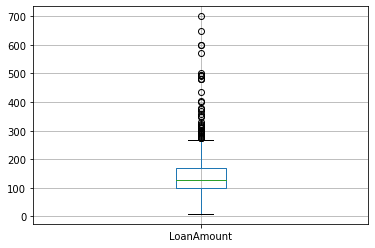

In [67]:
testdata.boxplot(column='LoanAmount')


<AxesSubplot:>

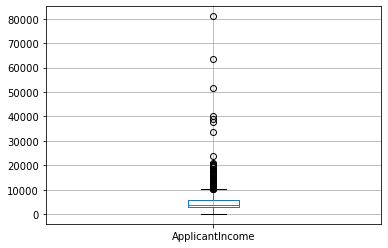

In [68]:
testdata.boxplot(column='ApplicantIncome')

In [69]:
testdata.LoanAmount = dataset.LoanAmount.fillna(testdata.LoanAmount.mean())


In [70]:
testdata['Loanamt_log']=np.log(testdata['LoanAmount'])

In [71]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loanamt_log          0
dtype: int64

In [72]:
testdata['TotalIncome']= testdata['ApplicantIncome'] + testdata['CoapplicantIncome']
testdata['TotalIncome_log']= np.log(testdata['TotalIncome'])

<AxesSubplot:>

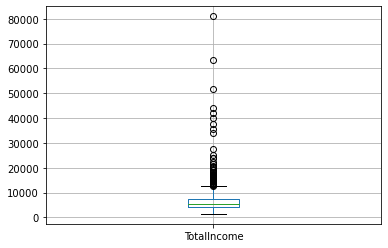

In [73]:
testdata.boxplot(column='TotalIncome')

In [74]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamt_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


# Conclusion :
1. The chances of getting a loan will be higher for:

    - Applicants having a credit history (we observed this in exploration.)
    - Applicants with higher applicant and co-applicant incomes
    - Applicants with higher education level
    - Properties in urban areas with high growth perspectives

In [75]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamt_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [76]:
testdata.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
testdata.replace({'Married':{'Yes':1,'No':0}},inplace=True)
testdata.replace({'Dependents':{'+3':0,'3+':1}},inplace=True)
testdata.replace({'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)
testdata.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)
testdata.replace({'Property_Area':{'Urban':0,'Rural':1, 'Semiurban': 2}},inplace=True)
testdata.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)
testdata = testdata.fillna(0)

In [77]:
X_test= testdata[attributes]
Y_test = testdata[["Loan_Status"]]
np.ravel(Y_test)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [78]:
def DecisionTree(userinput):
    #import tree 
    from sklearn import tree

    # empty model of the decision tree
    DTClassifier = tree.DecisionTreeClassifier()  
    DTClassifier =  DTClassifier.fit(X,Y)

    # calculating accuracy-----------------------
    from sklearn.metrics import accuracy_score
    ypred= DTClassifier.predict(X_test)
    # --------------------------------------------

    # Prediction
    inputtest = [userinput]
    predict = DTClassifier.predict(inputtest)
    predicted=predict[0]

    # check if prediction is done successfully 
    h='no'
    for a in range(0,len(LoanEligible)):
        if(predicted == a):
            h='yes' 
            break
        
    if (h=='yes'):
        return(LoanEligible[a], accuracy_score(Y_test, ypred,normalize=True)*100) 
    else:
        return("Not Found", "Not Found")

In [79]:
joblib.dump(DTClassifier,"dtf.pkl")

['dtf.pkl']

In [81]:

Gender = input("Gender (0.0 for Male 1.0 for Female): ")
Married = input("Married (1.0 for Married 0.0 for Unmarried): ")
Dependents = input("Dependents (0 for Independent 1 for Dependent): ")
Education = input("Education (0 for Not graduated 1 for Graduated): ")
Self_Employed = input("Self_Employed (0.0 for No 1.0 for Yes): ")
ApplicantIncome =  input("Applicant Income (Eg.4583): ")
CoapplicantIncome = input("Coapplicant Income (Eg. 1516.0): ")
LoanAmount = input("Loan Amount in Rs. (Eg. 120.0):1")
Loan_Amount_Term = input("Loan Amount Term in days (Eg. 360.0): ")
Credit_History = input("Credit History (Eg. 1.0 or 0.0): ")
Property_Area = input("Property Area  (0 for Urban, 1 for Rural, 2 for Semiurban): ") 
userinput = [Gender, Married, Dependents, Education,
      Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount,
       Loan_Amount_Term, Credit_History, Property_Area]

print("====================================================")
print("Using Decision Tree Algorithm:", DecisionTree(userinput))


Using Decision Tree Algorithm: ('Sorry! your not eligible for loan', 99.8371335504886)
